<a href="https://colab.research.google.com/github/AlinaSalaieva/NM/blob/main/%D0%9B%D0%A013_%D0%A1%D0%B0%D0%BB%D0%B0%D1%94%D0%B2%D0%B0_%D0%9212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

x = [1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 
y = [4.6    4.8599 5.1298 5.4088 5.6962 5.9908 6.2919 6.5983 6.9092 7.2236
 7.5406]


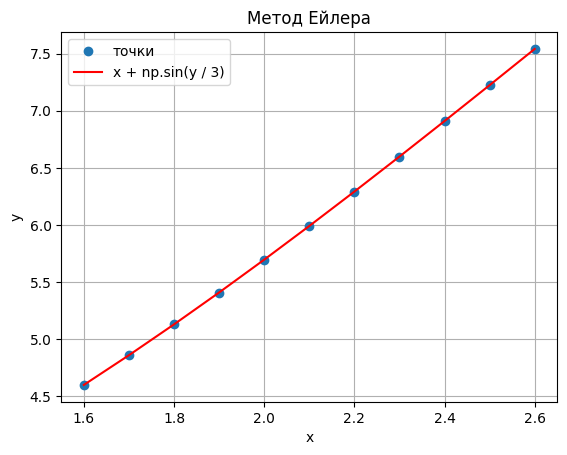

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y/3)

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 1.6, 2.6, 0.1, 4.6

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "x + np.sin(y / 3)"])
plt.grid()
plt.show()

In [ ]:
#Додати перевірку odeint для першого завдання


In [ ]:
#додати перевірку solve_ivp для перешого завдання

#Метод Ейлера-Коші

Кількість кроків: 10
Розмір x: (11,), значення: [1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8]
x = [1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8]
y = [2.6    2.8201 3.0408 3.2619 3.4831 3.7045 3.926  4.1478 4.3701 4.5931
 4.8173]
Розмір x: 11, Розмір y: 11


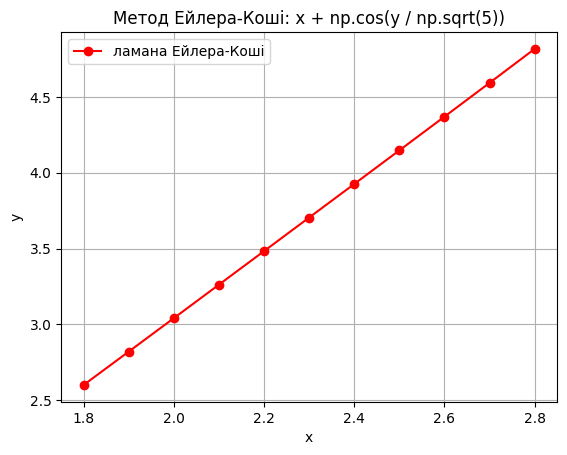

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.cos(y / np.sqrt(5))

a = 1.8  # ліва межа відрізку
b = 2.8  # права межа відрізку
h = 0.1  # крок
y0 = 2.6  # початкова умова

# Правильний розрахунок кількості кроків
n = int(round((b - a) / h))  # Використовуємо round для уникнення проблем з плаваючою точкою

print(f"Кількість кроків: {n}")

# Генерація x
x = np.linspace(a, b, n + 1)  # Використовуємо linspace для точного розподілу

print(f"Розмір x: {x.shape}, значення: {x}")

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
# Використовується середнє значення для нахилу
  y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round(y, 4)

print("x =", x)
print("y =", y_rounded)
print(f"Розмір x: {len(x)}, Розмір y: {len(y)}")

# Візуалізація
plt.plot(x, y, "o-", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші: x + np.cos(y / np.sqrt(5))")
plt.legend(["ламана Ейлера-Коші"])
plt.grid()
plt.show()


#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6]
y= [4.6        4.86496546 5.1394669  5.42264357 5.71357114 6.01128142
 6.31478559 6.62309816 6.93526195 7.25037179 7.56759628]


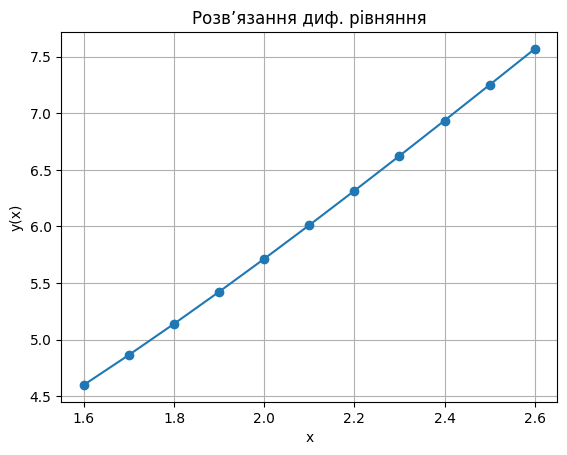

In [24]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.sin(y/3)

# Початкова умова
y0 = 4.6

# Значення x
x = np.arange(1.6, 2.7, 0.1)

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6]
y= [4.6        4.86496543 5.13950377 5.42273906 5.71367699 6.01134022
 6.31476953 6.62302377 6.93517988 7.25033292 7.56759603]


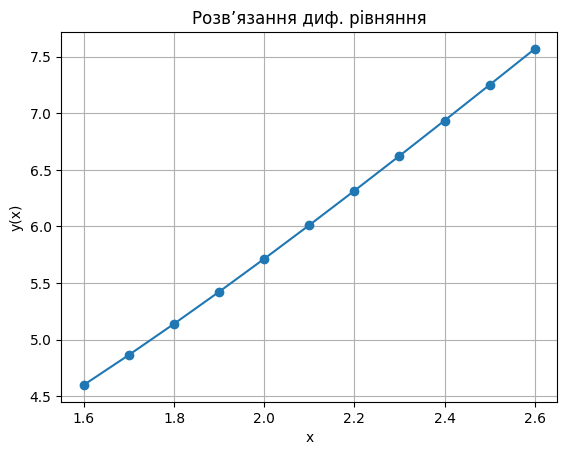

In [25]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.sin(y/3)

# Початкова умова
y0 = [4.6]  # Потрібно передати як список

# Значення x
x = np.linspace(1.6, 2.6, 11)

# Розв'язання ODE
sol = solve_ivp(model, [1.6, 2.6], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()
